In [0]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [42]:
url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-iris.csv'
df=pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
features=['sepal_length','sepal_width','petal_length','petal_width']
X=df[features]
y=df.species

In [74]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 80% training and 20% test

In [0]:
# Create adaboost classifer object
AdaModel = AdaBoostClassifier(n_estimators=150,learning_rate=1)

# Train Adaboost Classifer
model = AdaModel.fit(X_train, y_train)

In [54]:
predictions = AdaModel.predict(X_test)
print('Classification Report:\n',classification_report(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.93      0.87      0.90        15
   virginica       0.82      0.90      0.86        10

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.94      0.93      0.93        45

Accuracy Score: 0.9333333333333333


In [47]:
AdaBoostRegressor()

NameError: ignored

In [0]:
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abcSV =AdaBoostClassifier(n_estimators=100, base_estimator=svc,learning_rate=1)
modelSVC = abcSV.fit(X_train, y_train)
predictionsSVM = modelSVC.predict(X_test)

In [62]:
print('Classification Report:\n',classification_report(y_test, predictionsSVM))
print('Accuracy Score:',accuracy_score(y_test, predictionsSVM))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.92      0.80      0.86        15
   virginica       0.75      0.90      0.82        10

    accuracy                           0.91        45
   macro avg       0.89      0.90      0.89        45
weighted avg       0.92      0.91      0.91        45

Accuracy Score: 0.9111111111111111


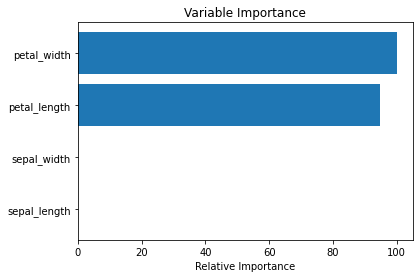

In [75]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Plot feature importance
feature_importance = AdaModel.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [67]:
print(AdaModel.feature_importances_)

[0.         0.         0.48666667 0.51333333]


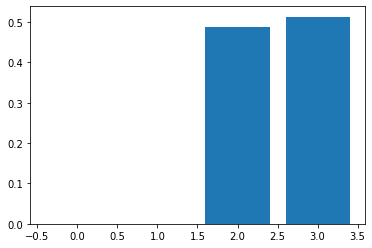

In [70]:
# plot
plt.bar(range(len(AdaModel.feature_importances_)), AdaModel.feature_importances_)
plt.show()